# Bank Note Authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Data is taken from Kaggle platform. Objective is to create end to end model

In [238]:
# install useful lib
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [239]:
# read csv file
df=pd.read_csv("BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


From the data it is classification model '0' means note is not authenticate and '1' means it is. Variance, skewness,curtosis,entropy are indepedent variables and class is dependent.

In [240]:
# To check number of rows and columns
df.shape

(1372, 5)

In [241]:
# To check missing value
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

Ohhh... There is no missing value in the dataset.

In [242]:
# class value distribution
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

No need to do EDA since data is balanced and no missing value

# Data to build model

In [243]:
X=df.drop('class',axis=1)
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [244]:
y=df['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

# Split data into train and test

In [245]:
#import lib to train test split
import sklearn
from sklearn.model_selection import train_test_split

In [246]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [247]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1029, 4)
y_train: (1029,)
X_test: (343, 4)
y_test: (343,)


In [248]:
from sklearn.preprocessing import StandardScaler

In [249]:
scaler = StandardScaler()

X=scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# 1) Logistic regression

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [251]:
log_reg= LogisticRegression(solver='liblinear')

log_reg.fit(X_train, y_train)
log_reg_accuracies = cross_val_score(estimator = log_reg,X=X_train,y=y_train,cv=10)

print("Accuracies is :",log_reg_accuracies)


Accuracies is : [0.99029126 0.97087379 0.99029126 1.         0.99029126 0.98058252
 0.97087379 0.98058252 0.98058252 0.98039216]


In [252]:
print("Mean Accuracies is : ",log_reg_accuracies.mean())

Mean Accuracies is :  0.983476108890158


In [253]:
log_reg_y_pred=log_reg.predict(X_test)

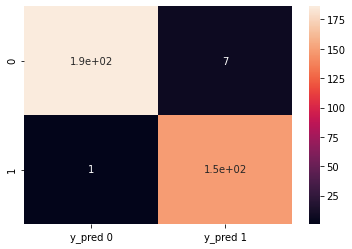

In [254]:
cm = confusion_matrix(y_test,log_reg_y_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['y_pred 0','y_pred 1']])

sns.heatmap(df_cm,annot=True)

# 2) KNN Classifier

In [255]:
from sklearn.neighbors import KNeighborsClassifier

In [256]:
for n in range(1,10):
    
    #Train Model and Predict  
    knn_classifier = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    knn_accuracies = cross_val_score(estimator=knn_classifier,X=X_train,y=y_train,cv=10)
    print("Mean Accuracies is : ",knn_accuracies.mean(),'for k =', n)



Mean Accuracies is :  0.9970873786407767 for k = 1
Mean Accuracies is :  0.9980582524271846 for k = 2
Mean Accuracies is :  0.9980582524271846 for k = 3
Mean Accuracies is :  0.9980582524271846 for k = 4
Mean Accuracies is :  0.9980582524271846 for k = 5
Mean Accuracies is :  0.9980582524271846 for k = 6
Mean Accuracies is :  0.9980582524271846 for k = 7
Mean Accuracies is :  0.9990291262135923 for k = 8
Mean Accuracies is :  0.9990291262135923 for k = 9


k=2 is best for model

In [257]:
knn_classifier = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)

In [258]:
knn_accuracies = cross_val_score(estimator=knn_classifier,X=X_train,y=y_train,cv=10)
print("Accuracies: ",knn_accuracies)

Accuracies:  [0.98058252 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [259]:
print("Mean Accuracies is : ",knn_accuracies.mean())

Mean Accuracies is :  0.9980582524271846


In [260]:
knn_y_pred = knn_classifier.predict(X_test)

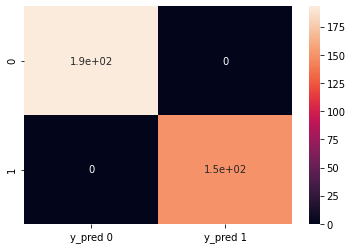

In [261]:
cm = confusion_matrix(y_test,knn_y_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['y_pred 0','y_pred 1']])

sns.heatmap(df_cm,annot=True)

# 3) SVM Classifier

In [262]:
from sklearn.svm import SVC

In [263]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train,y_train)
svm_accuracies = cross_val_score(estimator=svm_classifier,X=X_train,y=y_train,cv=10)
print("Accuracies:\n ",svm_accuracies)

Accuracies:
  [1.         0.98058252 0.99029126 1.         0.99029126 0.98058252
 0.97087379 0.98058252 0.99029126 0.98039216]


In [264]:
print("Mean Accuracy:",svm_accuracies.mean())

Mean Accuracy: 0.9863887302493813


In [265]:
svm_y_pred = svm_classifier.predict(X_test)


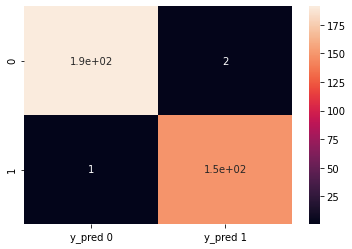

In [266]:
cm = confusion_matrix(y_test,svm_y_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['y_pred 0','y_pred 1']])

sns.heatmap(df_cm,annot=True)

Compare all above model choose the best

In [268]:
print('Logistic Regression: {0:.2f} %'.format(log_reg_accuracies.mean()*100))
print('KNN Classifier: {0:.2f} %'.format(knn_accuracies.mean()*100))
print('SVM Classifier: {0:.2f} %'.format(svm_accuracies.mean()*100))

Logistic Regression: 98.35 %
KNN Classifier: 99.81 %
SVM Classifier: 98.64 %


KNN Classifier has high accuracy.

In [269]:
# create a pickle file
import pickle
pickle_file=open('knn_classifier.pkl','wb')
pickle.dump(knn_classifier,pickle_file)
pickle_file.close()